Y at Pixel 1000, mean = 0.1559, sigma = 0.0013
X at Pixel 1000, mean = 0.0001, sigma = 0.0014
Y at Pixel 1001, mean = 1.4121, sigma = 0.0444
X at Pixel 1001, mean = 0.0019, sigma = 0.0482
Y at Pixel 1002, mean = 3.9304, sigma = 0.1033
X at Pixel 1002, mean = 0.0043, sigma = 0.1069
Y at Pixel 1003, mean = 7.7077, sigma = 0.1797
X at Pixel 1003, mean = 0.0058, sigma = 0.1770
Circle Center = (1991.3854, -100.1693), Radius = 1991.3877, Radius Error = 0.1057


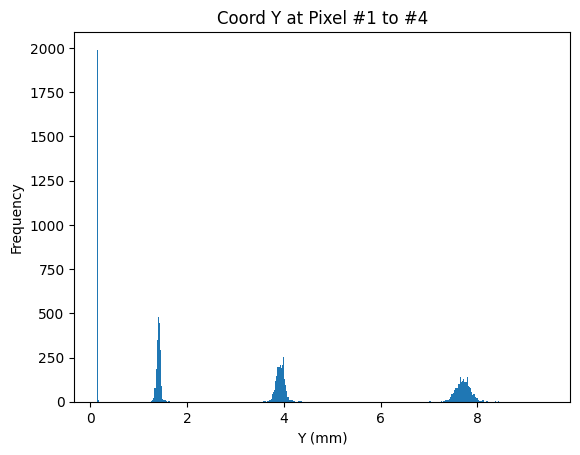

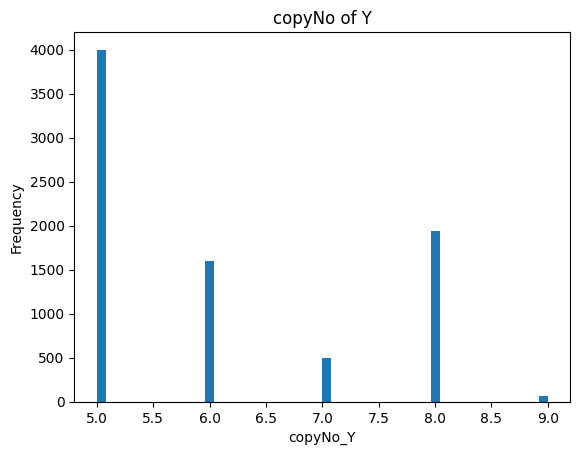

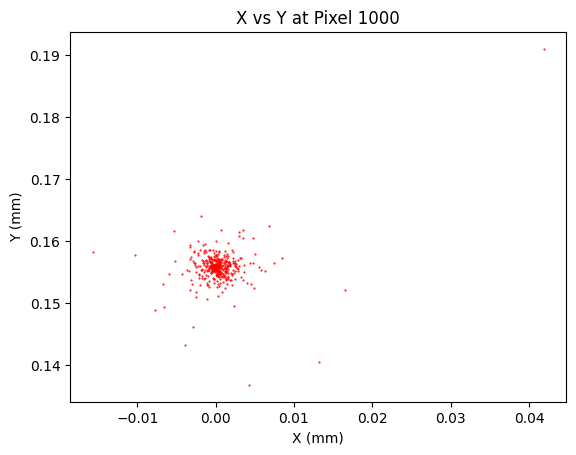

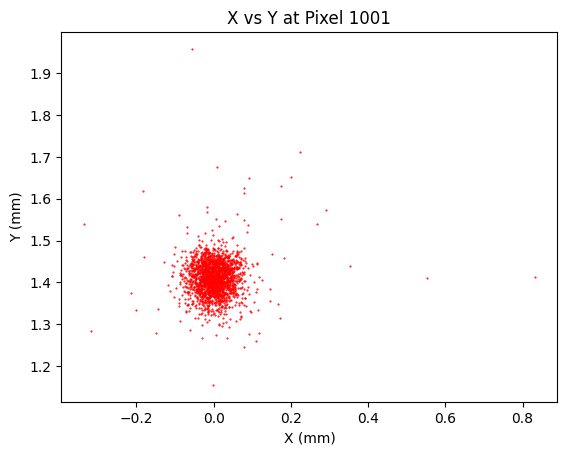

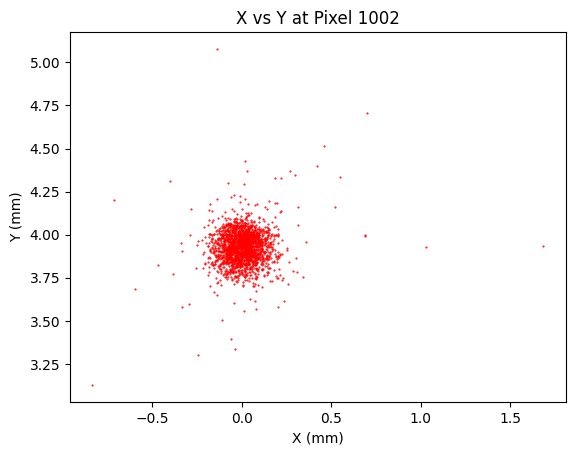

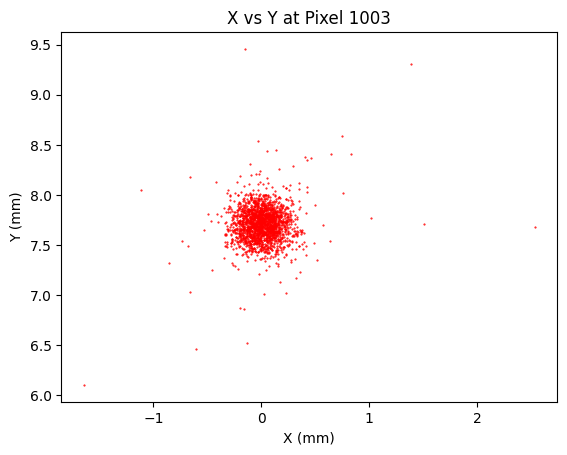

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def calculate_stats(data, column):
    mean_value = data[column].mean()
    std_value = data[column].std()
    return mean_value, std_value

def plot_histogram(data, column, bins, xlabel, ylabel, title, filename):
    plt.hist(data[column], bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

def plot_scatter(data, x_column, y_column, xlabel, ylabel, title, filename):
    plt.scatter(data[x_column], data[y_column], c="red", s=1, marker=".")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

def fit_circle(x, y):
    def calc_radius(c):
        return np.sqrt((x - c[0])**2 + (y - c[1])**2)
    
    def fun(c):
        ri = calc_radius(c)
        return ri - ri.mean()
    
    center_estimate = np.mean(x), np.mean(y)
    result = least_squares(fun, center_estimate)
    center = result.x
    radius = calc_radius(center).mean()
    residuals = calc_radius(center) - radius
    radius_error = np.sqrt(np.sum(residuals**2) / len(residuals))
    return center, radius, radius_error

# Read the CSV file
df = pd.read_csv("P10_Pixel_Four_Output.csv", header=None)

# Extract data frames according to the Pixel replica number in column 3
pixel_replicas = {
    1000: df[df.iloc[:, 3] == 1000],
    1001: df[df.iloc[:, 3] == 1001],
    1002: df[df.iloc[:, 3] == 1002],
    1003: df[df.iloc[:, 3] == 1003]
}

# Calculate and print statistics for each pixel replica
for pixel_id, data in pixel_replicas.items():
    mean_y, std_y = calculate_stats(data, 5)
    print(f"Y at Pixel {pixel_id}, mean = {mean_y:.4f}, sigma = {std_y:.4f}")
    
    mean_x, std_x = calculate_stats(data, 4)
    print(f"X at Pixel {pixel_id}, mean = {mean_x:.4f}, sigma = {std_x:.4f}")

# Perform least squares fit for all data points in df[5] and df[6]
center, radius, radius_error = fit_circle(df[5], df[6])
print(f"Circle Center = ({center[0]:.4f}, {center[1]:.4f}), Radius = {radius:.4f}, Radius Error = {radius_error:.4f}")

# Plot histogram of coordinate Y including all pixels
plot_histogram(df, 5, bins=400, xlabel="Y (mm)", ylabel="Frequency", title="Coord Y at Pixel #1 to #4", filename="WorldY")
plot_histogram(df, 2, bins=50, xlabel="copyNo_Y", ylabel="Frequency", title="copyNo of Y", filename="copyNo_Y")
# Plot scatter plots for each pixel replica
for pixel_id, data in pixel_replicas.items():
    plot_scatter(data, 4, 5, xlabel="X (mm)", ylabel="Y (mm)", title=f"X vs Y at Pixel {pixel_id}", filename=f"scatterXY_{pixel_id}")




